In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.width', 200)
df_mergedUS = pd.read_csv('df_mergedUS.csv')
df_mergedUK = pd.read_csv('df_mergedUK.csv')

In [2]:
df_mergedUS.head()

,Annual Inflation Rate,Quarterly GDP Change,Interest Rate Quarterly,Unemployment Rate Quarterly
0,4.562353,1.305474,8.910000,5.466667
1,4.847178,0.584260,9.100000,5.466667
2,4.346052,1.323657,8.956667,5.333333
3,4.518577,1.011264,9.206667,5.200000
4,6.414052,0.760203,8.773333,5.233333


In [3]:
df_mergedUS.corr()

,Annual Inflation Rate,Quarterly GDP Change,Interest Rate Quarterly,Unemployment Rate Quarterly
Annual Inflation Rate,1.000000,0.295871,0.239073,-0.244145
Quarterly GDP Change,0.295871,1.000000,0.083922,-0.215855
Interest Rate Quarterly,0.239073,0.083922,1.000000,-0.123764
Unemployment Rate Quarterly,-0.244145,-0.215855,-0.123764,1.000000


In [4]:
df_mergedUK.head()

,Annual Inflation Rate,Quarterly GDP Change,Interest Rate Quarterly,Unemployment Rate Quarterly
0,7.614098,2.480186,8.88,8.7
1,3.219333,3.007100,11.88,8.4
2,4.516820,2.917238,12.88,8.0
3,4.205032,2.489297,12.88,7.6
4,8.791563,1.760053,13.75,7.2


In [5]:
df_mergedUK.corr()

,Annual Inflation Rate,Quarterly GDP Change,Interest Rate Quarterly,Unemployment Rate Quarterly
Annual Inflation Rate,1.000000,0.171440,0.253415,0.068180
Quarterly GDP Change,0.171440,1.000000,0.167079,0.046167
Interest Rate Quarterly,0.253415,0.167079,1.000000,0.375955
Unemployment Rate Quarterly,0.068180,0.046167,0.375955,1.000000


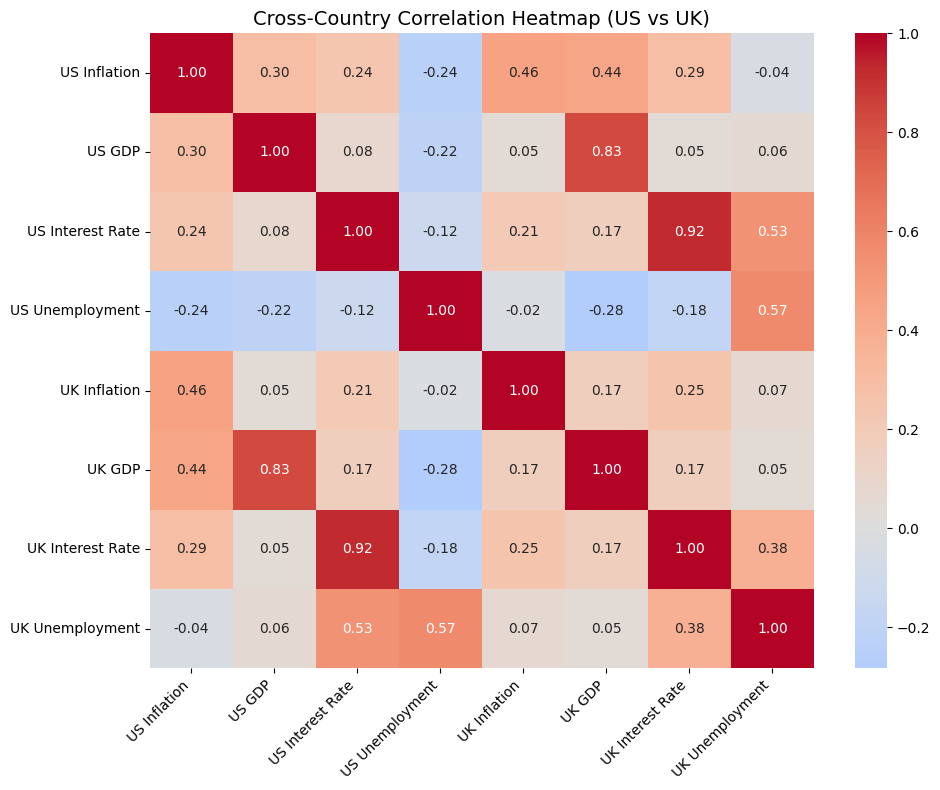

In [7]:
# Compute correlation matrix
corr = df_combined.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")

# Add title
plt.title("Cross-Country Correlation Heatmap (US vs UK)", fontsize=14)

# Rotate axis labels if needed
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [8]:
df_mergedUS = pd.read_csv('df_merged US.csv')
df_mergedUK = pd.read_csv('df_merged UK.csv')

In [9]:
df_mergedUS.head()

,DATE,Annual Inflation Rate,Quarterly GDP Change,Interest Rate Quarterly,Unemployment Rate Quarterly
0,1988-06-30,4.562353,1.305474,8.910000,5.466667
1,1988-09-30,4.847178,0.584260,9.100000,5.466667
2,1988-12-31,4.346052,1.323657,8.956667,5.333333
3,1989-03-31,4.518577,1.011264,9.206667,5.200000
4,1989-06-30,6.414052,0.760203,8.773333,5.233333


In [10]:
df_mergedUS.tail()

,DATE,Annual Inflation Rate,Quarterly GDP Change,Interest Rate Quarterly,Unemployment Rate Quarterly
142,2023-12-31,2.756113,0.785579,4.440000,3.800000
143,2024-03-31,3.638664,0.403985,4.160000,3.833333
144,2024-06-30,2.719364,0.736263,4.443333,4.000000
145,2024-09-30,1.386308,0.756641,3.946667,4.166667
146,2024-12-31,2.988338,0.605230,4.283333,4.133333


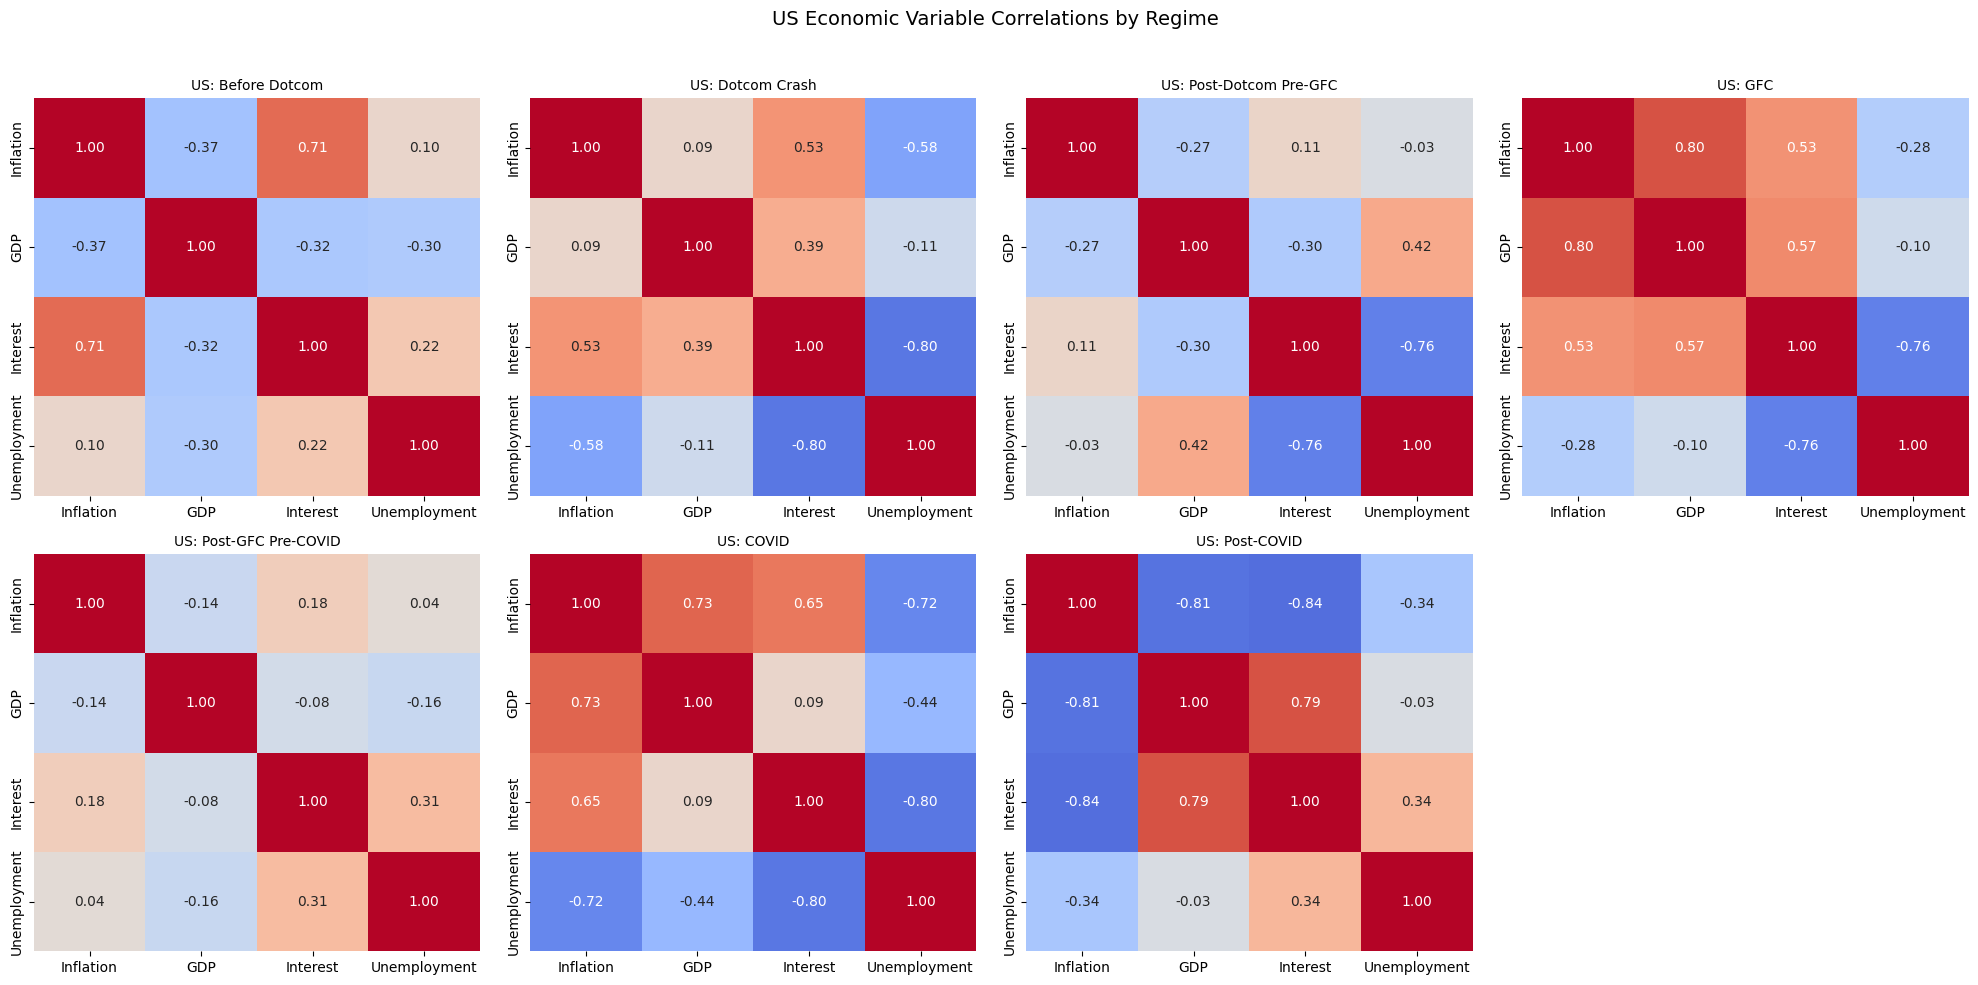

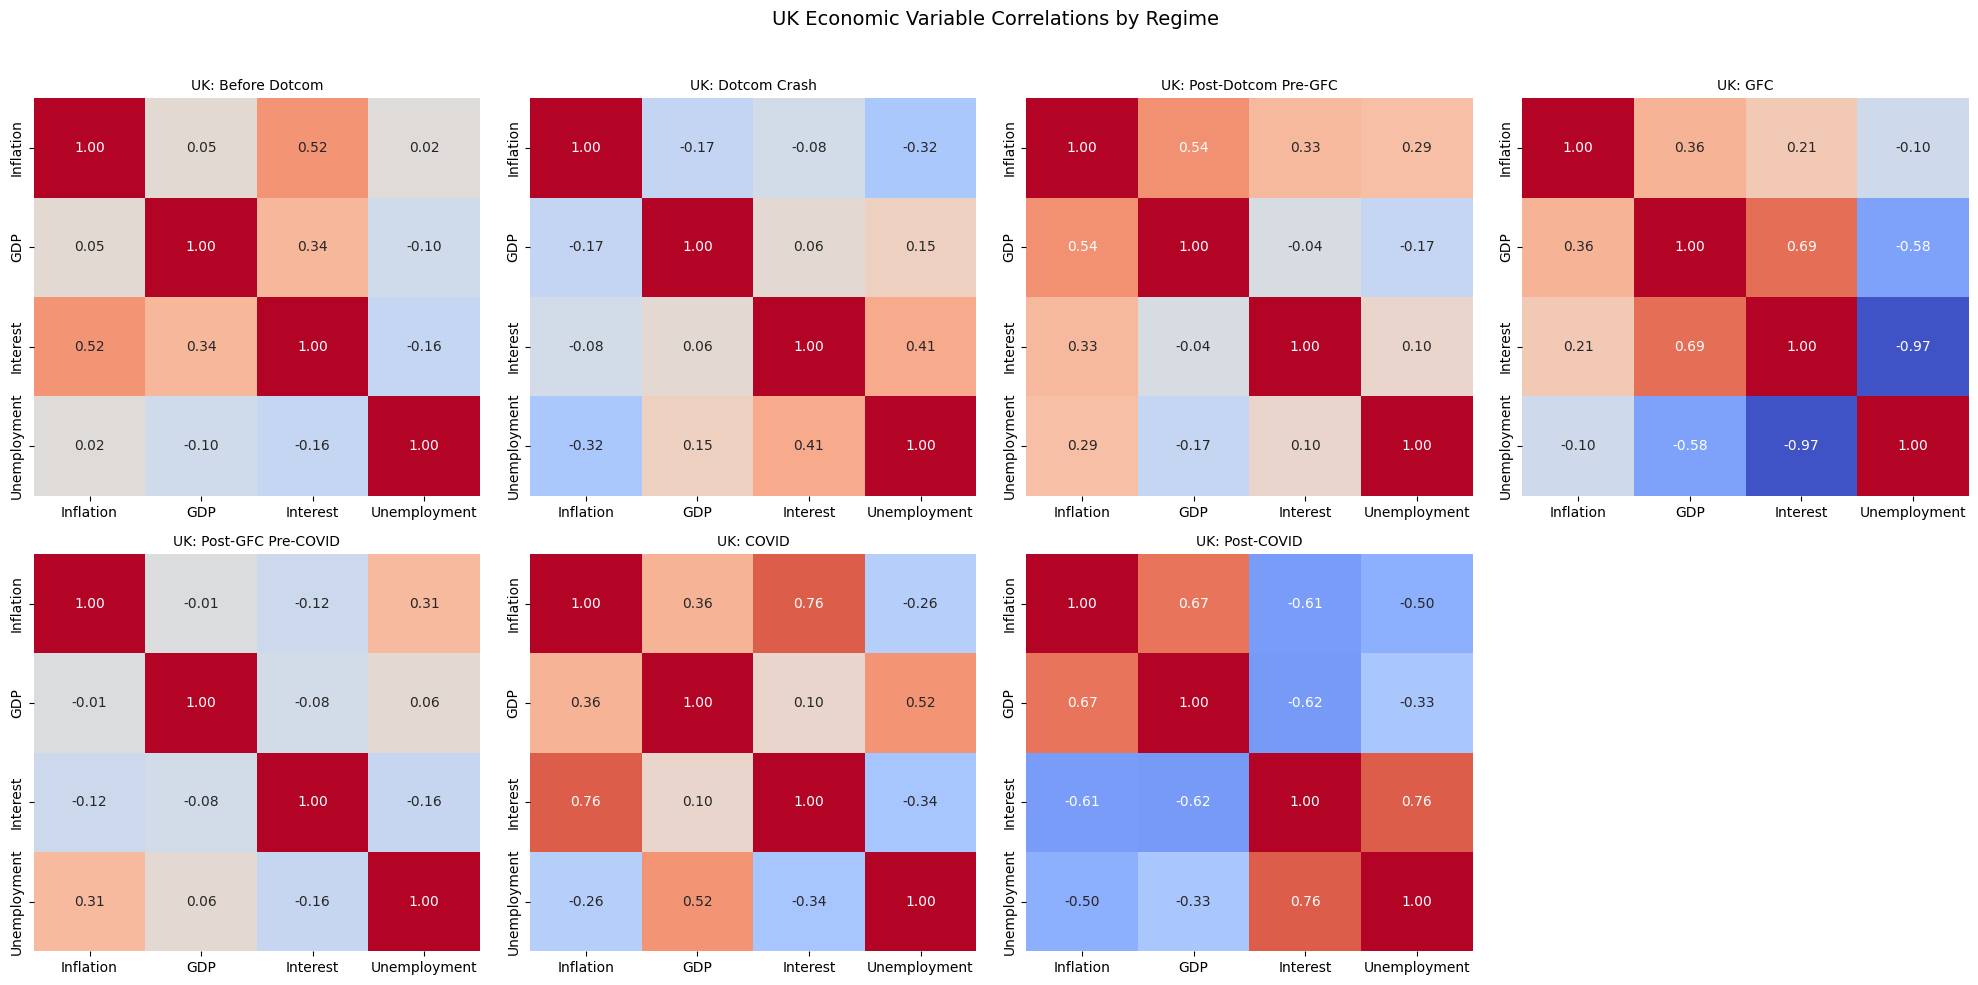

In [12]:
df_mergedUS['DATE'] = pd.to_datetime(df_mergedUS['DATE'])
df_mergedUK['DATE'] = pd.to_datetime(df_mergedUK['DATE'])

# Rename columns for consistency
df_us = df_mergedUS.rename(columns={
    "Annual Inflation Rate": "Inflation",
    "Quarterly GDP Change": "GDP",
    "Interest Rate Quarterly": "Interest",
    "Unemployment Rate Quarterly": "Unemployment"
})

df_uk = df_mergedUK.rename(columns={
    "Annual Inflation Rate": "Inflation",
    "Quarterly GDP Change": "GDP",
    "Interest Rate Quarterly": "Interest",
    "Unemployment Rate Quarterly": "Unemployment"
})

# Define regimes
regimes = {
    "Before Dotcom": ('1988-01-01', '1999-12-31'),
    "Dotcom Crash": ('2000-01-01', '2002-12-31'),
    "Post-Dotcom Pre-GFC": ('2003-01-01', '2006-12-31'),
    "GFC": ('2007-01-01', '2009-12-31'),
    "Post-GFC Pre-COVID": ('2010-01-01', '2019-12-31'),
    "COVID": ('2020-01-01', '2021-12-31'),
    "Post-COVID": ('2022-01-01', '2024-12-31'),
}

# Helper function to create subplots with 4 in 1st row and 3 in 2nd
def plot_country_heatmaps(df, country_name):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    for i, (regime, (start, end)) in enumerate(regimes.items()):
        subset = df[(df['DATE'] >= start) & (df['DATE'] <= end)]
        ax = axes[i]
        if not subset.empty:
            corr = subset.drop(columns='DATE').corr()
            sns.heatmap(corr, ax=ax, cmap='coolwarm', center=0, annot=True, fmt=".2f", cbar=False)
            ax.set_title(f"{country_name}: {regime}", fontsize=10)
        else:
            ax.set_title(f"{country_name}: {regime}\n(No Data)")
            ax.axis('off')

    if len(regimes) < 8:
        axes[-1].axis('off')

    plt.suptitle(f"{country_name} Economic Variable Correlations by Regime", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_country_heatmaps(df_us, "US")
plot_country_heatmaps(df_uk, "UK")
